<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_2_4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.4_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,46.264098,81.650869,51.599772,4.379028e-06,189.514744,189.514771,-0.000027
1,0.0,1.0,81.840958,62.942708,43.787942,6.377782e-06,198.571615,198.571577,0.000038
2,0.0,2.0,94.724574,31.887939,94.638143,-1.704051e-04,231.250486,231.250500,-0.000013
3,0.0,3.0,64.153591,86.125996,32.669788,3.773433e-07,192.949375,192.949460,-0.000085
4,0.0,4.0,32.515947,94.512432,54.863752,-2.812337e-06,191.892129,191.892232,-0.000104
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,68.829876,89.732314,99.132256,-6.868222e-06,267.694438,267.694332,0.000107
19996,999.0,16.0,93.078455,26.826459,87.898646,-2.240798e-04,217.803337,217.803483,-0.000146
19997,999.0,17.0,98.553324,40.635125,27.790039,5.066224e-05,176.978538,176.978513,0.000025
19998,999.0,18.0,48.973211,89.035677,62.449359,-1.620304e-05,210.458230,210.458235,-0.000005


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    46.264098  81.650869  51.599772  ...  189.514744  189.514771 -0.000027
      1.0    81.840958  62.942708  43.787942  ...  198.571615  198.571577  0.000038
      2.0    94.724574  31.887939  94.638143  ...  231.250486  231.250500 -0.000013
      3.0    64.153591  86.125996  32.669788  ...  192.949375  192.949460 -0.000085
      4.0    32.515947  94.512432  54.863752  ...  191.892129  191.892232 -0.000104
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   68.829876  89.732314  99.132256  ...  267.694438  267.694332  0.000107
      16.0   93.078455  26.826459  87.898646  ...  217.803337  217.803483 -0.000146
      17.0   98.553324  40.635125  27.790039  ...  176.978538  176.978513  0.000025
      18.0   48.973211  89.035677  62.449359  ...  210.458230  210.458235 -0.000005
      19.0   71.913372  44.951659  40.281139  ...  167.146153  167.146204 -0.000050

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    46.264098  81.650869  51.599772  ...  189.514744  189.514771 -0.000027
      1.0    81.840958  62.942708  43.787942  ...  198.571615  198.571577  0.000038
      2.0    94.724574  31.887939  94.638143  ...  231.250486  231.250500 -0.000013
      3.0    64.153591  86.125996  32.669788  ...  192.949375  192.949460 -0.000085
      4.0    32.515947  94.512432  54.863752  ...  191.892129  191.892232 -0.000104
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   68.829876  89.732314  99.132256  ...  267.694438  267.694332  0.000107
      16.0   93.078455  26.826459  87.898646  ...  217.803337  217.803483 -0.000146
      17.0   98.553324  40.635125  27.790039  ...  176.978538  176.978513  0.000025
      18.0   48.973211  89.035677  62.449359  ...  210.458230  210.458235 -0.000005
      19.0   71.913372  44.951659  40.281139  ...  167.146153  167.146204 -0.000050

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,46.264098,81.650869,51.599772,4.379028e-06,189.514744,189.514771,-0.000027
1,0.0,1.0,81.840958,62.942708,43.787942,6.377782e-06,198.571615,198.571577,0.000038
2,0.0,2.0,94.724574,31.887939,94.638143,-1.704051e-04,231.250486,231.250500,-0.000013
3,0.0,3.0,64.153591,86.125996,32.669788,3.773433e-07,192.949375,192.949460,-0.000085
4,0.0,4.0,32.515947,94.512432,54.863752,-2.812337e-06,191.892129,191.892232,-0.000104
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,68.829876,89.732314,99.132256,-6.868222e-06,267.694438,267.694332,0.000107
19996,999.0,16.0,93.078455,26.826459,87.898646,-2.240798e-04,217.803337,217.803483,-0.000146
19997,999.0,17.0,98.553324,40.635125,27.790039,5.066224e-05,176.978538,176.978513,0.000025
19998,999.0,18.0,48.973211,89.035677,62.449359,-1.620304e-05,210.458230,210.458235,-0.000005


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    46.264098  81.650869  51.599772  ...  189.514744  189.514771 -0.000027
      1.0    81.840958  62.942708  43.787942  ...  198.571615  198.571577  0.000038
      2.0    94.724574  31.887939  94.638143  ...  231.250486  231.250500 -0.000013
      3.0    64.153591  86.125996  32.669788  ...  192.949375  192.949460 -0.000085
      4.0    32.515947  94.512432  54.863752  ...  191.892129  191.892232 -0.000104
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   68.829876  89.732314  99.132256  ...  267.694438  267.694332  0.000107
      16.0   93.078455  26.826459  87.898646  ...  217.803337  217.803483 -0.000146
      17.0   98.553324  40.635125  27.790039  ...  176.978538  176.978513  0.000025
      18.0   48.973211  89.035677  62.449359  ...  210.458230  210.458235 -0.000005
      19.0   71.913372  44.951659  40.281139  ...  167.146153  167.146204 -0.000050

[20000 rows x 7 columns]

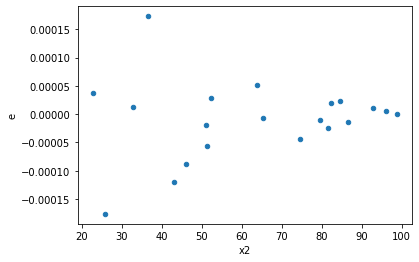

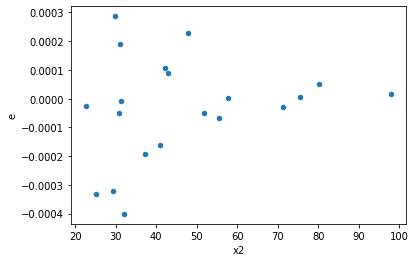

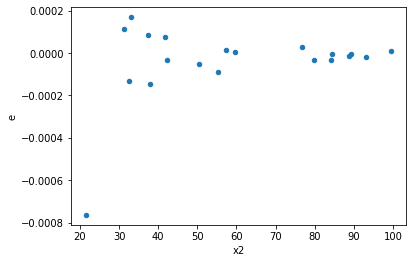

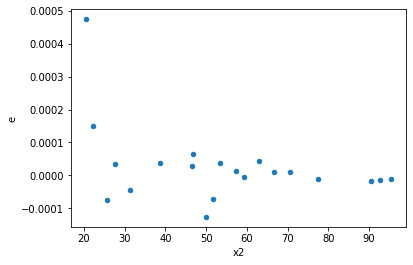

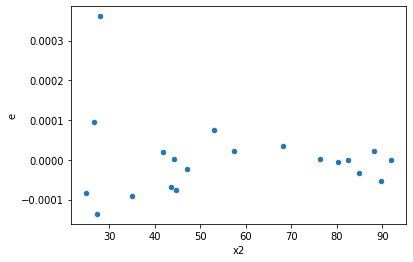

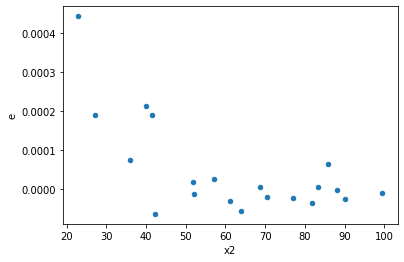

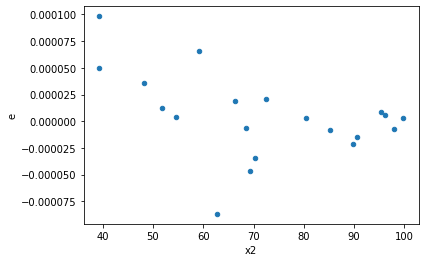

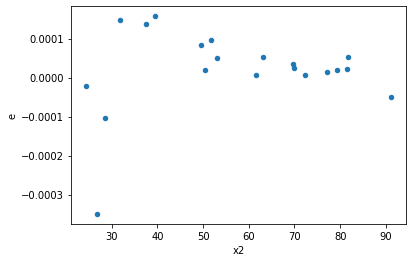

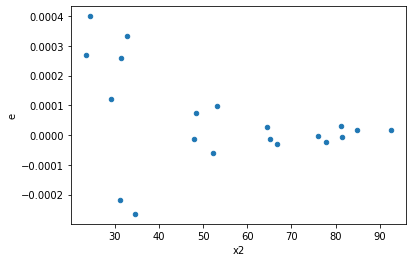

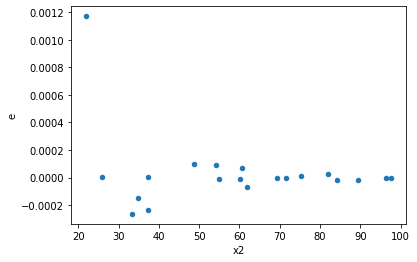

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero 

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,7.0,7.0,4.653125989526847e-09,3.39283838177776e-07,7.755209982544745e-10,5.654730636296267e-08,72.91524857513606,1.0449425413838753e-05,0.9999947752872931,Reject005=0 : Heteroscedasticity
3.0,4.0,10.0,3.4773117065709816e-08,1.9478968538043517e-06,1.1591039021903271e-08,2.164329837560391e-07,22.406928319062843,0.008804849228618128,0.9955975753856909,Reject005=0 : Heteroscedasticity
6.0,6.0,8.0,6.276775089425644e-09,6.710531569932105e-08,1.2553550178851288e-09,9.586473671331579e-09,8.01828742585966,0.020536476396965764,0.9897317618015171,Reject005=0 : Heteroscedasticity
7.0,5.0,9.0,3.495108132839711e-09,5.4108968016674943e-08,8.737770332099278e-10,6.763621002084368e-09,8.600746141326965,0.028950888966793098,0.9855245555166035,Reject005=0 : Heteroscedasticity
9.0,7.0,7.0,6.080261127682551e-09,4.6191074275805937e-07,1.0133768546137584e-09,7.69851237930099e-08,75.96889887755749,9.078533683926082e-06,0.999995460733158,Reject005=0 : Heteroscedasticity
10.0,7.0,7.0,1.666270508255077e-08,2.996079250051605e-08,2.7771175137584617e-09,4.993465416752675e-09,1.7980749435390941,0.45691221638788737,0.7715438918060563,Reject005=1 : Homoscedasticity
14.0,10.0,4.0,2.1080344885585474e-08,2.651139336428746e-08,2.3422605428428304e-09,8.837131121429153e-09,3.1440891394542225,0.1290803979778843,0.9354598010110579,Reject005=1 : Homoscedasticity
15.0,8.0,6.0,2.8029118609156155e-08,8.514682747544998e-08,4.004159801308022e-09,1.7029365495089997e-08,4.050398618796165,0.07275388355594825,0.9636230582220259,Reject005=1 : Homoscedasticity
16.0,7.0,7.0,7.659679175646966e-09,1.391954110828942e-08,1.276613195941161e-09,2.3199235180482367e-09,1.8172485804033327,0.44892669996680223,0.7755366500165989,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,7.0,4.653125989526847e-09,3.39283838177776e-07,7.755209982544745e-10,5.654730636296267e-08,72.91524857513606,1.0449425413838753e-05,Reject005=0 : Heteroscedasticity
1.0,8.0,6.0,1.7344141934513674e-07,3.7081598072416433e-09,2.477734562073382e-08,7.416319614483286e-10,0.02850653030279659,0.0003498810980800512,Reject005=0 : Heteroscedasticity
2.0,7.0,7.0,9.257694420402916e-08,5.890703848586295e-09,1.5429490700671526e-08,9.817839747643825e-10,0.06363035525998618,0.0017320829310004512,Reject005=0 : Heteroscedasticity
3.0,4.0,10.0,3.4773117065709816e-08,1.9478968538043517e-06,1.1591039021903271e-08,2.164329837560391e-07,22.406928319062843,0.008804849228618128,Reject005=0 : Heteroscedasticity
4.0,9.0,5.0,5.195644539302828e-07,3.4475048177873873e-09,6.494555674128535e-08,8.618762044468468e-10,0.011943674408584496,0.00012925736223129102,Reject005=0 : Heteroscedasticity
5.0,8.0,6.0,9.14220372512676e-08,1.522180679219787e-08,1.3060291035895371e-08,3.044361358439574e-09,0.22200054822466508,0.0830593436753181,Reject005=1 : Homoscedasticity
6.0,6.0,8.0,6.276775089425644e-09,6.710531569932105e-08,1.2553550178851288e-09,9.586473671331579e-09,8.01828742585966,0.020536476396965764,Reject005=0 : Heteroscedasticity
7.0,5.0,9.0,3.495108132839711e-09,5.4108968016674943e-08,8.737770332099278e-10,6.763621002084368e-09,8.600746141326965,0.028950888966793098,Reject005=0 : Heteroscedasticity
8.0,11.0,3.0,1.3930116232075929e-08,1.882134028000483e-09,1.393011623207593e-09,9.410670140002416e-10,0.4954128154923511,0.6143577634704321,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    652
Reject005=1 : Homoscedasticity      348
Name: Result_test, dtype: int64